In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.1.0
!pip install plot_keras_history
!pip install seaborn

In [13]:
import pandas as pd
import numpy as np

import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten, MaxPooling1D, Input, Concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1,l2

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

import matplotlib.pyplot as plt
from plot_keras_history import plot_history

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: Settin

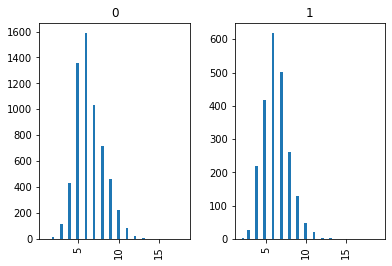

<Figure size 432x288 with 0 Axes>

In [14]:
#Data Loading

news=pd.read_csv('drive/My Drive/Colab Data/name_genders_train.csv')
news.head()
news = news.sample(frac=1).reset_index(drop=True)
a = news.groupby("gender")
a.head()
a.describe()
y=news['gender']
X=news['name']


for index,gender in enumerate(y):
    if gender=='Female' or gender=='female':
        y[index]=1
    else:
        y[index]=0
    
##check the length to determine the document length for DNN

length=news['name'].apply(len)
news=news.assign(Length=length)

#Plot the distribution of the document length for each category

news.hist(column='Length',by='gender',bins=50)

plt.figure()

MAX_LEN=20

##load names from different source as fresh test data

newtest=pd.read_csv('drive/My Drive/Colab Data/name_test.csv')
y_newtest=newtest['gender']
X_newtest=newtest['name']


for index,gender in enumerate(y_newtest):
    if gender=='Female' or gender=='female':
        y_newtest[index]=1
    else:
        y_newtest[index]=0

In [15]:
#Data Preparation

text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#create class weight dict
#If 'balanced', class weights will be given by n_samples / (n_classes * np.bincount(y)

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights_d = dict(enumerate(class_weights))


tokenizer = Tokenizer(num_words=None,lower=True, char_level=True, oov_token='UNK')
tokenizer.fit_on_texts(text_train)
X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)
X_newtest = tokenizer.texts_to_sequences(X_newtest)


word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # Adding 1 because of reserved 0 index
maxlen = MAX_LEN 

#Padding the sentences
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_newtest = pad_sequences(X_newtest, padding='post', maxlen=maxlen)

In [ ]:
#Define Basic model with hidden_dim=32
model = Sequential()
model.add(Dense(32, input_dim=maxlen, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)#by default 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.5343
Valuating Accuracy:  0.4886
{'val_loss': [0.7659116472823647, 0.7335150280760726, 0.7019967460660969, 0.7069491790350217, 0.6739217961221206, 0.6845238497365127, 0.6869037710145134, 0.6917227067181622, 0.6835952218313145, 0.7223267324647762], 'val_accuracy': [0.4937925636768341, 0.48137766122817993, 0.516219437122345, 0.5038045644760132, 0.5778934955596924, 0.544653594493866, 0.5626752376556396, 0.535843014717102, 0.5506607890129089, 0.48858630657196045], 'loss': [1.2048126802058143, 0.7379616554602699, 0.7091825313679426, 0.6946790059571245, 0.6855303110676945, 0.6781014054450962, 0.67320065681688, 0.6685054038465534, 0.6646181510724933, 0.6612239714099335], 'accuracy': [0.4806042, 0.52506006, 0.5406797, 0.55235153, 0.5611054, 0.5750086, 0.5741504, 0.5817027, 0.5968074, 0.5988671]}


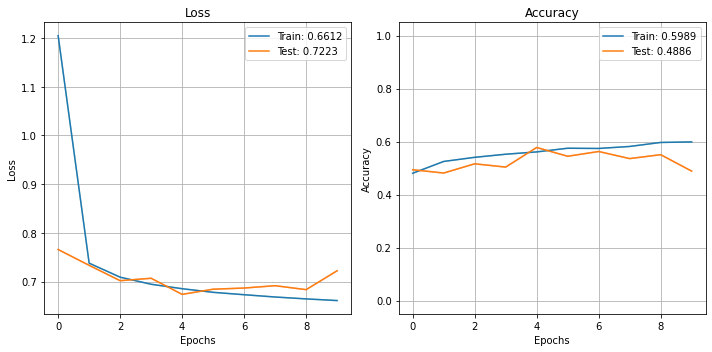

In [ ]:
#train model with differnt epochs
#epochs=10
hist = model.fit(X_train, y_train,
                    class_weight = class_weights_d,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
plot_history(hist.history)
print(hist.history)


Training Accuracy: 0.7427
Valuating Accuracy:  0.6988
Testing Accuracy:  0.6359


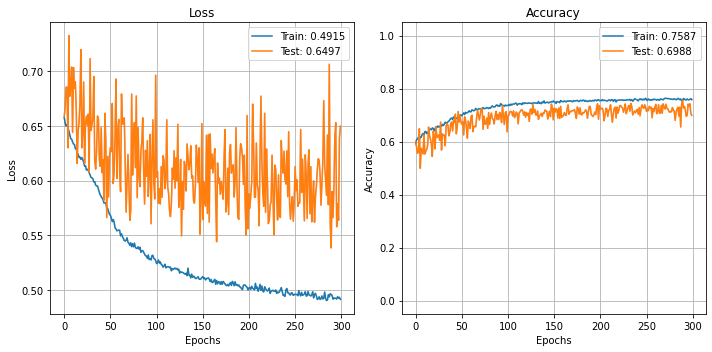

In [ ]:

#epochs=300
hist = model.fit(X_train, y_train,
                    class_weight = class_weights_d,
                    epochs=300,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_newtest, y_newtest, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(hist.history)

In [ ]:
##In case of underfitting 
##making model more complex 
def MLP(hidden_dim, num_epochs=100):
    
    model = Sequential()
    model.add(Dense(hidden_dim, input_dim=maxlen, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    hist = model.fit(X_train, y_train,
                    class_weight = class_weights_d,
                    epochs=num_epochs,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)
    #model.save(hidden_dim.h5)
    
    loss, accuracy = model.evaluate(X_newtest, y_newtest, verbose=True)
    
    return hist.history, loss, accuracy

651/651 [==============================] - 0s 46us/step


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


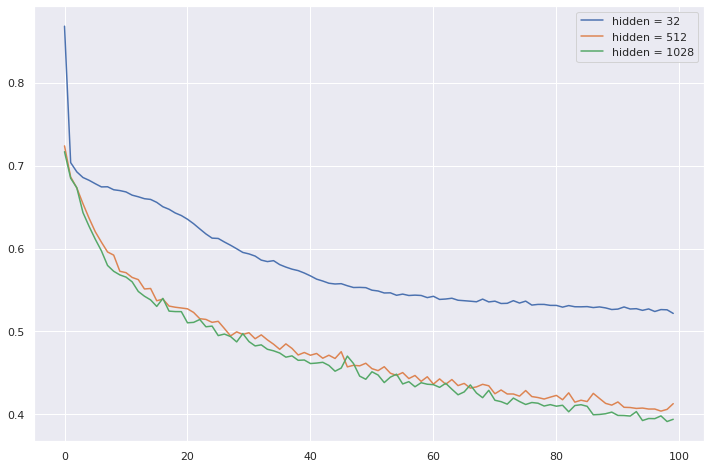

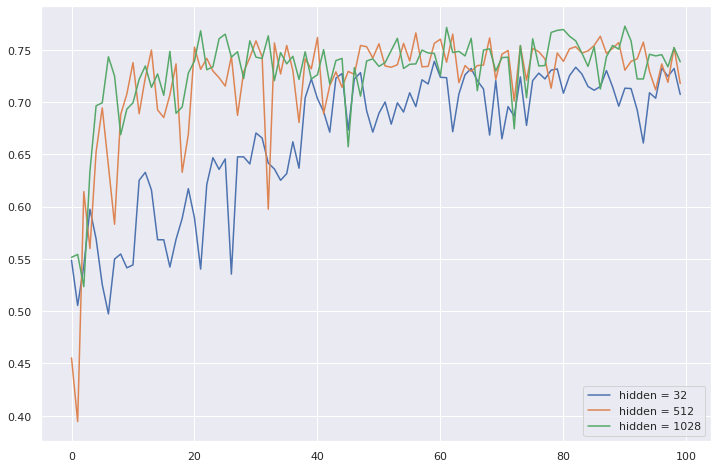

Testing Accuracy 512:  0.6636
Testing Accuracy 1028:  0.6805


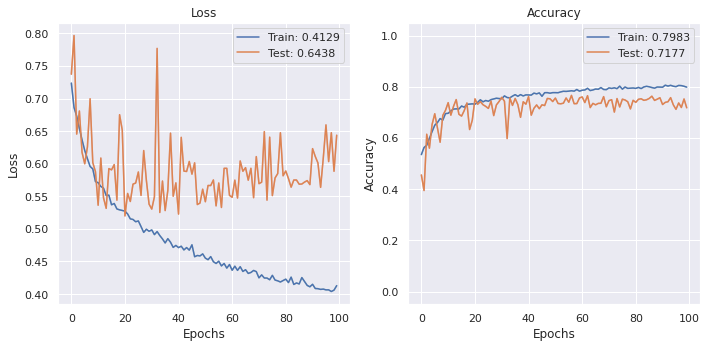

In [ ]:
#Increase the hidden dims

hist_h32,loss_h32,acc_h32 = MLP(32)
hist_h512,loss_h512,acc_h512 = MLP(512)
hist_h1028,loss_h1028,acc_h1028 = MLP(1028)
#hist_hmax,loss_hmax,acc_max = MLP(100000)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12, 8)})

plt.plot(hist_h32['loss'], label='hidden = 32')
plt.plot(hist_h512['loss'], label='hidden = 512')
plt.plot(hist_h1028['loss'], label='hidden = 1028')
#plt.plot(hist_hmax['loss'], label='hidden = max')
plt.legend(loc='upper right')
plt.show()


plt.plot(hist_h32['val_accuracy'], label='hidden = 32')
plt.plot(hist_h512['val_accuracy'], label='hidden = 512')
plt.plot(hist_h1028['val_accuracy'], label='hidden = 1028')
#plt.plot(hist_hmax['val_accuracy'], label='hidden = max')
plt.legend(loc='lower right')
plt.show()


plot_history(hist_h512)
print("Testing Accuracy 512:  {:.4f}".format(acc_h512))
print("Testing Accuracy 1028:  {:.4f}".format(acc_h1028))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               10752     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 43,649
Trainable params: 43,649
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.8623
Valuating Accuracy:  0.7293
Testing Accuracy:  0.6068


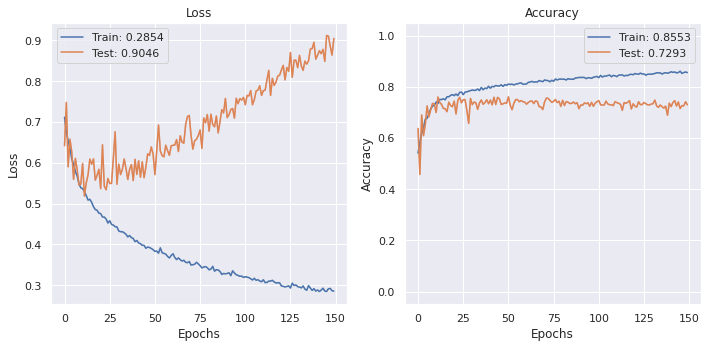

In [ ]:
##Still underfitting ? Add more layers

model = Sequential()
model.add(Dense(512, input_dim=maxlen, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

#epochs=150
hist = model.fit(X_train, y_train,
                    class_weight = class_weights_d,
                    epochs=150,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Valuating Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_newtest, y_newtest, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist.history)


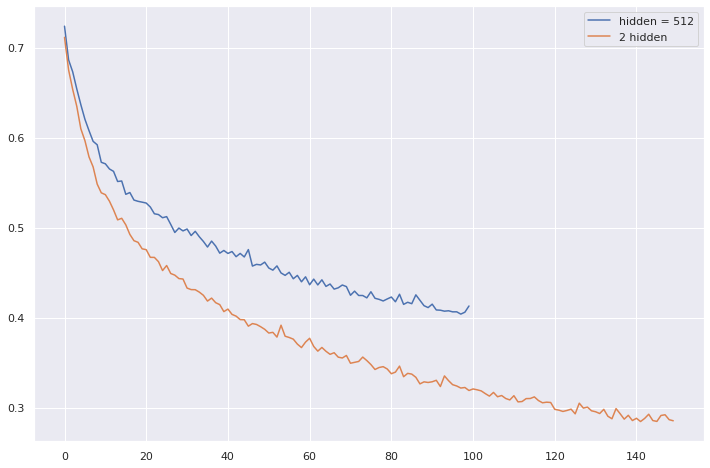

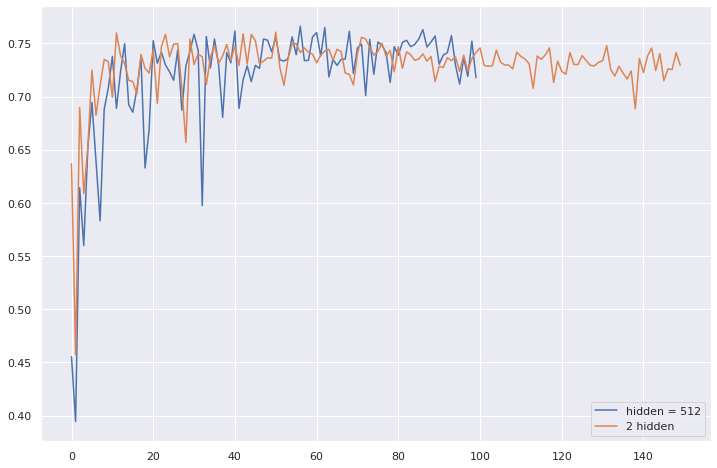

In [ ]:

plt.plot(hist_h512['loss'], label='hidden = 512')
plt.plot(hist.history['loss'], label='2 hidden ')
plt.legend(loc='upper right')
plt.show()

plt.plot(hist_h512['val_accuracy'], label='hidden = 512')
plt.plot(hist.history['val_accuracy'], label='2 hidden ')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Small network underfits (longer to converge)
#larger network easier to converge

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarn

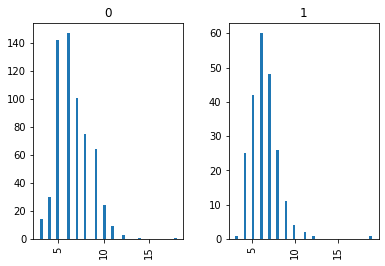

<Figure size 432x288 with 0 Axes>

In [ ]:
#To simulate the overfitting, reduce the dataset to 10%
#re-do preprocessing

news=pd.read_csv('drive/My Drive/Colab Data/name_genders_train.csv')
news.head()
news = news.sample(frac=0.1).reset_index(drop=True)
a = news.groupby("gender")
a.head()
a.describe()
y=news['gender']
X=news['name']


for index,gender in enumerate(y):
    if gender=='Female' or gender=='female':
        y[index]=1
    else:
        y[index]=0
    
##check the length to determine the document length for DNN

length=news['name'].apply(len)
news=news.assign(Length=length)

#Plot the distribution of the document length for each category

news.hist(column='Length',by='gender',bins=50)

plt.figure()

MAX_LEN=20

##load names from different source as fresh test data

newtest=pd.read_csv('drive/My Drive/Colab Data/name_test.csv')
y_newtest=newtest['gender']
X_newtest=newtest['name']


for index,gender in enumerate(y_newtest):
    if gender=='Female' or gender=='female':
        y_newtest[index]=1
    else:
        y_newtest[index]=0


text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#create class weight dict
#If 'balanced', class weights will be given by n_samples / (n_classes * np.bincount(y)

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights_d = dict(enumerate(class_weights))


tokenizer = Tokenizer(num_words=None,lower=True, char_level=True, oov_token='UNK')
tokenizer.fit_on_texts(text_train)
X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)
X_newtest = tokenizer.texts_to_sequences(X_newtest)


word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # Adding 1 because of reserved 0 index
maxlen = MAX_LEN 

#Padding the sentences
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_newtest = pad_sequences(X_newtest, padding='post', maxlen=maxlen)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               5376      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 257       
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________
Testing Accuracy:  0.5253


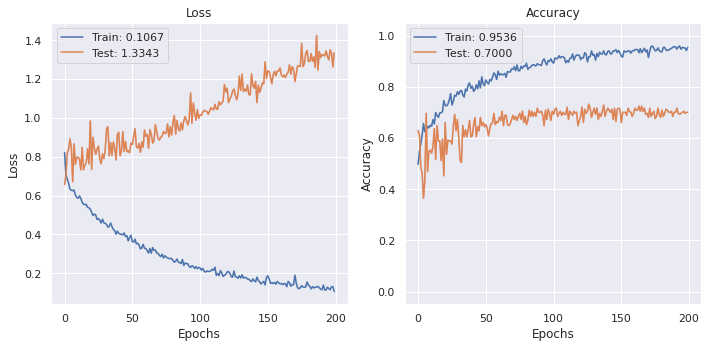

In [ ]:
#Try the model with small dataset

model = Sequential()
model.add(Dense(256, input_dim=maxlen, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

hist = model.fit(X_train, y_train,
                    class_weight = class_weights_d,
                    epochs=200,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=5).history

plot_history(hist)

loss, accuracy = model.evaluate(X_newtest, y_newtest, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
#######################################################
#Overfitting
#Too large network overfits
#Tooooooo large network don't train properly at all.
#####################################################

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               5376      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 257       
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________
Testing Accuracy:  0.5515


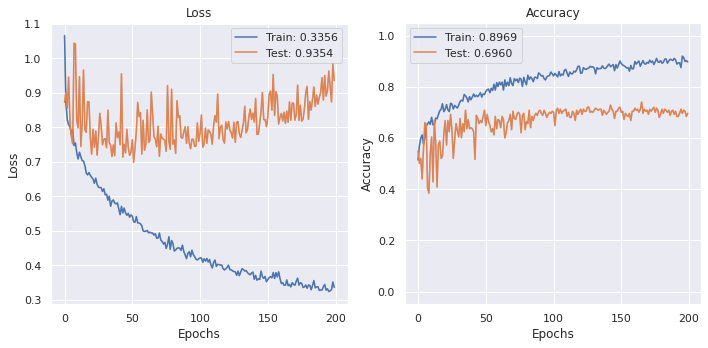

In [ ]:
#Add regularizer 
model_reg = Sequential()
model_reg.add(Dense(256, input_dim=maxlen, activation='relu',kernel_regularizer=l1(0.001)))
model_reg.add(Dense(1, activation='sigmoid'))
model_reg.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_reg.summary()

hist_reg = model_reg.fit(X_train, y_train,
                    class_weight = class_weights_d,
                    epochs=200,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=5).history

loss, accuracy = model_reg.evaluate(X_newtest, y_newtest, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist_reg)



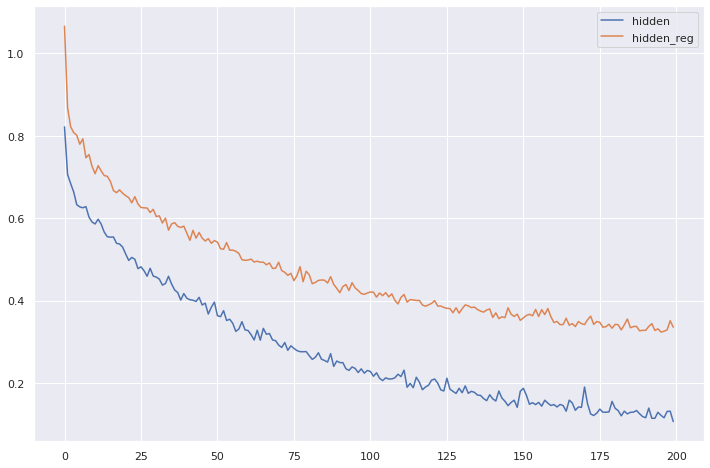

In [ ]:
plt.plot(hist['loss'], label='hidden ')
plt.plot(hist_reg['loss'], label='hidden_reg')
plt.legend(loc='upper right')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________
Testing Accuracy:  0.6452


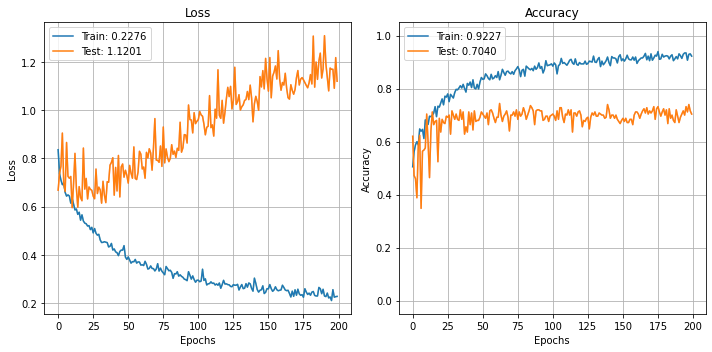

In [ ]:
#Add Dropout 
model_reg_dp = Sequential()
model_reg_dp.add(Dense(256, input_dim=maxlen, activation='relu',kernel_regularizer=l2(0.001)))
model_reg_dp.add(Dropout(0.01))
model_reg_dp.add(Dense(1, activation='sigmoid'))
model_reg_dp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_reg_dp.summary()

hist_dp_reg = model_reg_dp.fit(X_train, y_train,
                    class_weight = class_weights_d,
                    epochs=200,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=5).history

loss, accuracy = model_reg_dp.evaluate(X_newtest, y_newtest, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist_dp_reg)



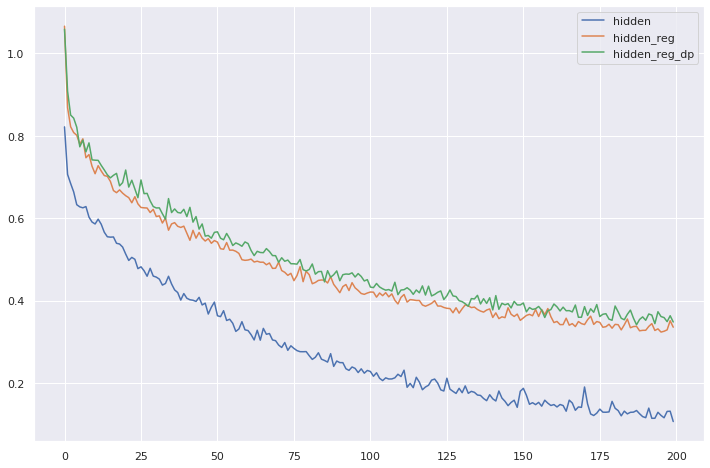

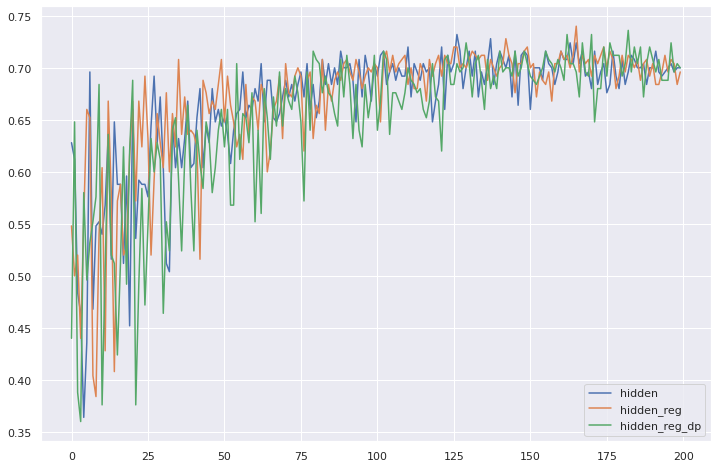

In [ ]:
plt.plot(hist['loss'], label='hidden')
plt.plot(hist_reg['loss'], label='hidden_reg')
plt.plot(hist_dp_reg['loss'], label='hidden_reg_dp')
plt.legend(loc='upper right')
plt.show()

plt.plot(hist['val_accuracy'], label='hidden')
plt.plot(hist_reg['val_accuracy'], label='hidden_reg')
plt.plot(hist_dp_reg['val_accuracy'], label='hidden_reg_dp')
plt.legend(loc='lower right')
plt.show()